In [1]:
cd ../src

/home/richard/Desktop/software/epicluster-results_upload/epicluster-results/src


In [2]:
from case_data_generation import generate_case_series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import scipy.stats

## Generate cases data according to known Rt profiles

## Example 1: Drop off (COVID)

In [3]:
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w / sum(w)

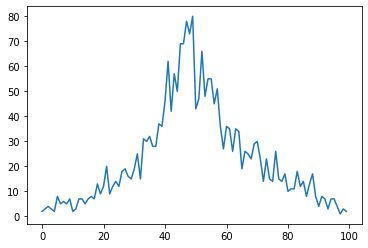

In [4]:
np.random.seed(111)

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

Rt_part_1 = np.repeat(1.3, 50)
Rt_part_2 = np.repeat(0.8, 50)

Rt_series = np.concatenate([Rt_part_1, Rt_part_2])

cases_df = generate_case_series(Rt_series, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)

cases_df.to_csv('../data/synthetic/synthetic1_dropoff.csv', index=False)

## Example 2: Resurgence (Ebola serial interval)

In [5]:
w = scipy.stats.gamma(2.707, scale=1/0.177)
w = w.pdf(np.arange(50))
w = w / sum(w)
np.savetxt("../data/synthetic/ebola_serial_interval.csv", w, delimiter=",")

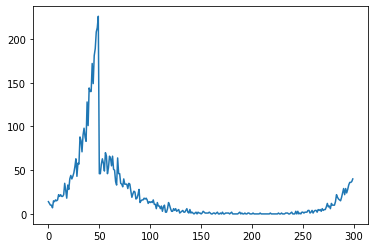

In [6]:
np.random.seed(111)

past_cases = np.ones(len(w)) * 5

Rt_part_1 = np.repeat(2.5, 50)
Rt_part_2 = np.repeat(0.5, 175)
Rt_part_3 = np.repeat(2.5, 75)

Rt_series = np.concatenate([Rt_part_1, Rt_part_2, Rt_part_3])

cases_df = generate_case_series(Rt_series, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)


cases_df.to_csv('../data/synthetic/synthetic2_resurgence.csv', index=False)

## Example 3: Slow drop off (COVID)

In [7]:
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w / sum(w)

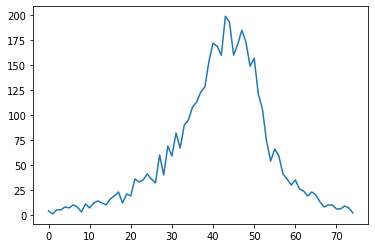

In [8]:
np.random.seed(111)

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5
past_cases[-4] = 5

Rt1 = np.repeat(1.5, 20)
Rt15 = np.repeat(0.8, 20)
Rt2 = 0.8 + np.linspace(0.0, 1.0, 2)
Rt3 = np.repeat(1.8, 15)
Rt4 = 1.8 - np.linspace(0.0, 1.2, 20)
Rt5 = np.repeat(0.6, 30)
Rt_series = np.concatenate([Rt1, Rt15, Rt2, Rt3, Rt4, Rt5])

Rt1 = np.repeat(1.5, 40)
Rt2 = 1.5 - np.linspace(0.0, 1.0, 15)
Rt3 = np.repeat(0.5, 20)
Rt_series = np.concatenate([Rt1, Rt2, Rt3])

cases_df = generate_case_series(Rt_series, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)


cases_df.to_csv('../data/synthetic/synthetic3_slowdropoff.csv', index=False)


## Drop off, low noise

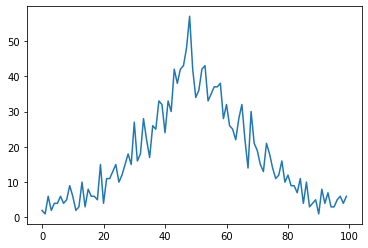

In [9]:
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w / sum(w)

np.random.seed(111)

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

Rt_part_1 = np.repeat(1.3, 50)
Rt_part_2 = np.repeat(0.8, 50)

Rt_series = np.concatenate([Rt_part_1, Rt_part_2])
Rt_series += np.random.normal(0.0, 0.025, len(Rt_series))

cases_df = generate_case_series(Rt_series, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)

cases_df.to_csv('../data/synthetic/synthetic4_lownoise.csv', index=False)

## Drop off, high noise

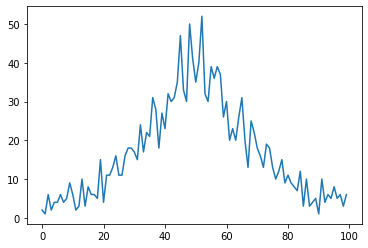

In [10]:
np.random.seed(111)

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

Rt_part_1 = np.repeat(1.3, 50)
Rt_part_2 = np.repeat(0.8, 50)

Rt_series = np.concatenate([Rt_part_1, Rt_part_2])
Rt_series += np.random.normal(0.0, 0.1, len(Rt_series))

cases_df = generate_case_series(Rt_series, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)

cases_df.to_csv('../data/synthetic/synthetic5_highnoise.csv', index=False)

## Sine wave

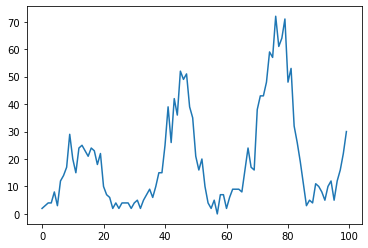

In [11]:
np.random.seed(111)

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

Rt_part_1 = np.sin(0.2*np.arange(100)) + 1.2

cases_df = generate_case_series(Rt_part_1, past_cases, w)
cases = cases_df['cases']

plt.plot(cases)
# plt.plot(Rt_part_1)

cases_df.to_csv('../data/synthetic/synthetic6_sine.csv', index=False)

## Negative binomial (various overdispersions)

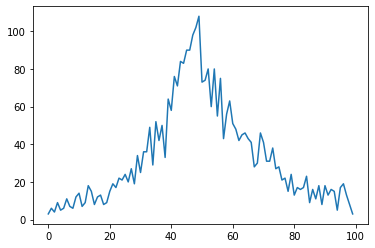

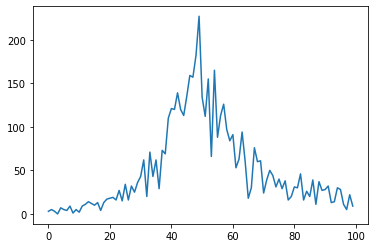

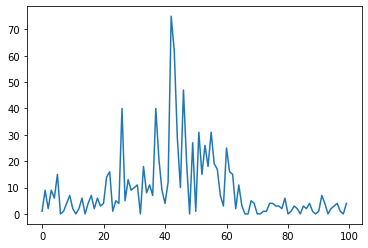

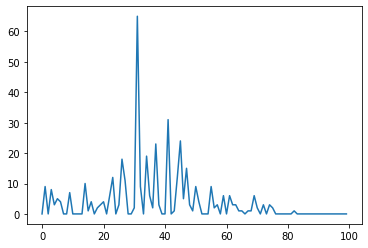

In [12]:
for kappa in [100, 10, 1, 0.5]:
    np.random.seed(1234)

    past_cases = np.zeros(len(w))
    past_cases[-1] = 5
    past_cases[-2] = 5
    past_cases[-3] = 5

    Rt_part_1 = np.repeat(1.3, 50)
    Rt_part_2 = np.repeat(0.8, 50)

    Rt_series = np.concatenate([Rt_part_1, Rt_part_2])

    cases_df = generate_case_series(Rt_series, past_cases, w, kappa=kappa)
    cases = cases_df['cases']

    plt.plot(cases)
    plt.show()

    cases_df.to_csv('../data/synthetic/negbin_{}.csv'.format(kappa), index=False)

## Ebola resurgence with different seeds

In [13]:
w = scipy.stats.gamma(2.707, scale=1/0.177)
w = w.pdf(np.arange(50))
w = w / sum(w)
np.savetxt("../data/synthetic/ebola_serial_interval.csv", w, delimiter=",")

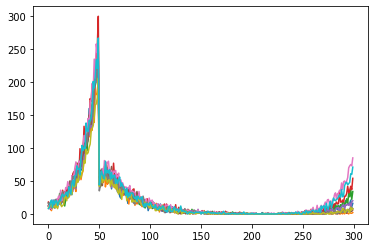

In [14]:
i = 0
k = 0
while i < 10:

    np.random.seed(2 + k)

    past_cases = np.ones(len(w)) * 5

    Rt_part_1 = np.repeat(2.5, 50)
    Rt_part_2 = np.repeat(0.5, 175)
    Rt_part_3 = np.repeat(2.5, 75)

    Rt_series = np.concatenate([Rt_part_1, Rt_part_2, Rt_part_3])

    cases_df = generate_case_series(Rt_series, past_cases, w)
    cases = cases_df['cases']
    
    if sum(list(cases)[-50:]) == 0:
        k += 1
    
    else:
        plt.plot(cases)
        cases_df.to_csv('../data/synthetic/ebola_seed{}.csv'.format(i), index=False)
        i += 1
        k += 1